In [11]:
import pandas as pd
data = pd.read_csv("/Users/kayla/Downloads/WVS_Cross-National_Wave_7_csv_v6_0.csv")

data.head()

/var/folders/zd/j52k_b1s599czqnbtb_mb_n40000gn/T/ipykernel_6718/709584946.py:2: DtypeWarning: Columns (346,348,350,580,581,582,583) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/Users/kayla/Downloads/WVS_Cross-National_Wave_7_csv_v6_0.csv")


,version,doi,A_WAVE,A_YEAR,A_STUDY,B_COUNTRY,B_COUNTRY_ALPHA,C_COW_NUM,C_COW_ALPHA,D_INTERVIEW,...,WVS_Polmistrust_PartyVoter,WVS_LR_MedianVoter,WVS_LibCon_MedianVoter,v2psbars,v2psorgs,v2psprbrch,v2psprlnks,v2psplats,v2xnp_client,v2xps_party
0,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070001,...,62.434211,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070002,...,62.434211,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070003,...,62.434211,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070005,...,66.964286,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
data.shape

(97220, 613)

In [14]:
# load in cultural map scores and format to match dataset
CultureMap_scores = pd.read_excel("/Users/kayla/Downloads/CulturalMapFinal.xlsx", sheet_name="Scores")
data["S025"] = data["S025"].astype(str)
CultureMap_scores["S025"] = CultureMap_scores["S025"].astype(str)
CultureMap_scores["S025"] = CultureMap_scores["S025"].str.split(" ").str[0]
CultureMap_scores.head()

,S025,TradAgg,SurvSAgg
0,81998,0.570498,-1.010323
1,82002,0.133405,-0.785438
2,82008,0.289334,-0.941726
3,82018,-0.745060,-0.830716
4,122002,-1.269662,-1.197026


In [15]:
# merge on S025 (country code)
data = pd.merge(data, CultureMap_scores, how='left', on='S025')

In [16]:
# checking shape after merging (correctly added 2 more columns)
data.shape

(97220, 615)

In [17]:
# check merged data
data.head(10)

,version,doi,A_WAVE,A_YEAR,A_STUDY,B_COUNTRY,B_COUNTRY_ALPHA,C_COW_NUM,C_COW_ALPHA,D_INTERVIEW,...,WVS_LibCon_MedianVoter,v2psbars,v2psorgs,v2psprbrch,v2psprlnks,v2psplats,v2xnp_client,v2xps_party,TradAgg,SurvSAgg
0,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070001,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.5486,2.182286
1,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070002,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.5486,2.182286
2,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070003,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.5486,2.182286
3,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5486,2.182286
4,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070005,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.5486,2.182286
5,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5486,2.182286
6,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5486,2.182286
7,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5486,2.182286
8,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070009,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.5486,2.182286
9,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5486,2.182286


In [18]:
data["TradAgg"].unique()

array([ 0.54860025, -0.40094151, -1.31096476,  0.5492769 , -1.50344302,
       -1.22660842, -0.30784002,  0.79752939,  0.2132709 ,  0.57546142,
       -1.56809185, -0.41213579,  1.33221872,  0.89092879, -1.72476629,
       -0.85436657, -1.32593537,  0.98084286,  0.26863269, -1.00599281,
        1.45890783, -1.21942224,         nan, -0.53922884, -0.8453    ,
       -1.57852101,  1.6146045 , -0.12884862, -0.92854557, -1.39430832,
        1.45357025, -0.5351887 , -1.75754018,  1.27130528, -0.31758635,
       -1.37796859, -1.06033902, -1.02543256,  0.74723941,  0.0545875 ,
       -1.37364572, -1.71256686,  0.11889628,  1.15620933,  0.53168141,
       -1.38331626, -1.05572121, -1.41454232, -1.5550555 , -0.38761133,
        0.38948098,  0.08875172,  0.48305757,  0.72609841,  0.25450707,
       -1.36800946, -0.59615327, -0.45628842,  1.12608962,  0.43122121,
       -0.32928471,  0.14436516, -1.06030859, -0.44293235, -0.58501878])

In [19]:
# dropping all missing values from target variable 

data = data.dropna(subset=["TradAgg"])
data["TradAgg"].unique()


array([ 0.54860025, -0.40094151, -1.31096476,  0.5492769 , -1.50344302,
       -1.22660842, -0.30784002,  0.79752939,  0.2132709 ,  0.57546142,
       -1.56809185, -0.41213579,  1.33221872,  0.89092879, -1.72476629,
       -0.85436657, -1.32593537,  0.98084286,  0.26863269, -1.00599281,
        1.45890783, -1.21942224, -0.53922884, -0.8453    , -1.57852101,
        1.6146045 , -0.12884862, -0.92854557, -1.39430832,  1.45357025,
       -0.5351887 , -1.75754018,  1.27130528, -0.31758635, -1.37796859,
       -1.06033902, -1.02543256,  0.74723941,  0.0545875 , -1.37364572,
       -1.71256686,  0.11889628,  1.15620933,  0.53168141, -1.38331626,
       -1.05572121, -1.41454232, -1.5550555 , -0.38761133,  0.38948098,
        0.08875172,  0.48305757,  0.72609841,  0.25450707, -1.36800946,
       -0.59615327, -0.45628842,  1.12608962,  0.43122121, -0.32928471,
        0.14436516, -1.06030859, -0.44293235, -0.58501878])

In [20]:
data["SurvSAgg"].unique()

array([ 2.18228636,  0.19130501, -0.71001005,  2.26270634, -0.68747893,
       -0.38281354, -0.09730071,  2.05547823, -0.10891501, -0.10705898,
        0.26415821, -0.49949597,  0.72984247,  2.15612768,  0.0182409 ,
       -2.23184719, -0.98013623,  2.23643556, -0.2852532 ,  0.00423455,
       -0.05824606, -0.840277  , -0.92364157, -1.3175    , -1.20898207,
        1.30200489, -0.68244782, -0.2731283 , -0.5517815 , -0.47083491,
       -1.07510422, -1.12560353,  0.20363616, -0.8134872 , -0.64820367,
        0.22602041, -0.95079136,  0.14703608, -0.38234533, -1.10277608,
       -0.36041122,  1.67641261,  2.38763639,  2.85659103, -0.63295704,
       -0.56285719,  0.10567144,  0.65969276, -0.80167249, -0.59504104,
       -0.12013059, -0.13865765,  0.1216685 ,  0.06584884, -0.61815969,
       -1.43237711, -0.70406949, -0.14471282, -0.49295814,  1.36106104,
        1.40337712, -0.25029058,  0.61279161, -1.87094987])

In [21]:
# split features and target variable
X = data.drop(columns=["S025"])
y = data["S025"]

In [22]:
# check missing values
null_sum = data.isnull().sum()
null_sum

version             0
doi                 0
A_WAVE              0
A_YEAR              0
A_STUDY             0
                ...  
v2psplats       90360
v2xnp_client    90360
v2xps_party     90360
TradAgg             0
SurvSAgg            0
Length: 615, dtype: int64

In [23]:
# dropping columns with at 30% missing values
data.drop(columns=data.columns[null_sum > len(data) * 0.3], inplace=True)

In [24]:
# check remaining columns (613 columns to 578)
data.shape, data.columns

((94278, 580),
 Index(['version', 'doi', 'A_WAVE', 'A_YEAR', 'A_STUDY', 'B_COUNTRY',
        'B_COUNTRY_ALPHA', 'C_COW_NUM', 'C_COW_ALPHA', 'D_INTERVIEW',
        ...
        'v2x_rule', 'v2xcl_acjst', 'td_voiacc', 'td_polstab', 'td_goveff',
        'td_regqual', 'td_rulelaw', 'td_ctrlcorr', 'TradAgg', 'SurvSAgg'],
       dtype='object', length=580))

In [25]:
# check the data types: columns with mixed types are stored as "object"
data.dtypes

version         object
doi             object
A_WAVE           int64
A_YEAR           int64
A_STUDY          int64
                ...   
td_regqual     float64
td_rulelaw     float64
td_ctrlcorr    float64
TradAgg        float64
SurvSAgg       float64
Length: 580, dtype: object

In [26]:
data.select_dtypes(include='object')


,version,doi,B_COUNTRY_ALPHA,C_COW_ALPHA,LNGE_ISO,S025,X002_02B,V002A_01,V001A_01
0,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,AND,AND,ca,202018,ES,ES,ES
1,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,AND,AND,ca,202018,AD,ES,ES
2,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,AND,AND,ca,202018,ES,ES,ES
3,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,AND,AND,ca,202018,ES,ES,ES
4,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,AND,AND,ca,202018,ES,ES,ES
...,...,...,...,...,...,...,...,...,...
97215,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,ZWE,ZIM,en,7162020,ZW,ZW,ZW
97216,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,ZWE,ZIM,en,7162020,ZW,ZW,ZW
97217,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,ZWE,ZIM,sn,7162020,ZW,ZW,ZW
97218,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,ZWE,ZIM,sn,7162020,ZW,ZW,ZW


In [27]:
list(data.columns)

['version',
 'doi',
 'A_WAVE',
 'A_YEAR',
 'A_STUDY',
 'B_COUNTRY',
 'B_COUNTRY_ALPHA',
 'C_COW_NUM',
 'C_COW_ALPHA',
 'D_INTERVIEW',
 'S007',
 'J_INTDATE',
 'FW_START',
 'FW_END',
 'K_TIME_START',
 'K_TIME_END',
 'K_DURATION',
 'Q_MODE',
 'N_REGION_ISO',
 'N_REGION_WVS',
 'N_REGION_NUTS2',
 'N_REG_NUTS1',
 'N_TOWN',
 'G_TOWNSIZE',
 'G_TOWNSIZE2',
 'H_SETTLEMENT',
 'H_URBRURAL',
 'I_PSU',
 'O1_LONGITUDE',
 'O2_LATITUDE',
 'L_INTERVIEWER_NUMBER',
 'S_INTLANGUAGE',
 'LNGE_ISO',
 'E_RESPINT',
 'F_INTPRIVACY',
 'E1_LITERACY',
 'W_WEIGHT',
 'S018',
 'PWGHT',
 'S025',
 'Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q7',
 'Q8',
 'Q9',
 'Q10',
 'Q11',
 'Q12',
 'Q13',
 'Q14',
 'Q15',
 'Q16',
 'Q17',
 'Q18',
 'Q19',
 'Q20',
 'Q21',
 'Q22',
 'Q23',
 'Q24',
 'Q25',
 'Q26',
 'Q27',
 'Q28',
 'Q29',
 'Q30',
 'Q31',
 'Q32',
 'Q33',
 'Q33_3',
 'Q34',
 'Q34_3',
 'Q35',
 'Q35_3',
 'Q36',
 'Q37',
 'Q38',
 'Q39',
 'Q40',
 'Q41',
 'Q42',
 'Q43',
 'Q44',
 'Q45',
 'Q46',
 'Q47',
 'Q48',
 'Q49',
 'Q50',
 'Q51',
 '

In [28]:
# renaming columns
data = data.rename(columns= {
    'A_STUDY' : 'Study',
    'X002_02B': 'Birth_Country_Name',
    'V002A_01': 'Mother_Country_Name',
    'V001A_01': 'Father_Country_Name',
    'A_WAVE': 'Wave',
    'A_YEAR': 'Year',
    'B_COUNTRY': 'Country_Code',
    'B_COUNTRY_ALPHA': 'Country_Name',
    'C_COW_NUM': 'CoW_Code',
    'C_COW_ALPHA': 'CoW_Name',
    'S025': 'CC+Year',
    'polregfh': 'FH_Pol_Regime',
    'fhregion': 'FH_Region',
    'freestfh': 'FH_Free_Status',
    'prfhrat': 'FH_Pol_Rights_rat',
    'prfhscore': 'FH_Pol_Rights_pts',
    'clfhrat': 'FH_CL_rat',
    'clfhscore': 'FH_CL_pts',
    'democ': 'Democracy_sc',
    'autoc': 'Autocracy_sc',
    'durable': 'Regime_Durability',
    'electintegr': 'Electoral_Integrity',
    'medageun': 'Median_Age',
    'compulseduc': 'Years_Comp_Edu',
    'femchoutsch': 'F_OutSchool',
    'choutsch': 'Ch_OutSchool',
    'v2cltrnslw': 'TransLaws',
    'v2clacjust': 'ClassEqual',
    'v2clsocgrp': 'SocGroupEqual',
    'v2clacfree': 'AcademicFree',
    'v2clrelig': 'ReligFree',
    'v2csrlgrep': 'ReligRep',
    'v2mecenefm': 'GovCensor',
    'v2mebias': 'MediaBias',
    'v2pepwrses': 'PowerDis_Soe',
    'v2pepwrgen': 'PowerDis_Gen',
    'v2peedueq': 'Edu_Eq',
    'v2peheath': 'Health_Eq',
    'v2peasjsoecon': 'Ac_StateJobs',
    'v2peapsecon': 'Ac_PubServ',
    'v2clgencl': 'Gen_Eq_CL',
    'v2peasjgen': 'Gen_Ac_StateJobs',
    'v2peasbgen': 'Gen_Ac_StateBus',
    'v2cafres': 'Free_Research',
    'v2cafexch': 'Free_Aca_Exc',
    'v2x_corr': 'Pol_Corrupt',
    'v2x_gender': 'F_PolEmpower',
    'v2x_gencl': 'F_CL',
    'v2x_genpp': 'F_PolPart',
    'v2x_rule': 'RoL',
    'v2xcl_acjst': 'AtJ',
    'v2x_freexp': 'Free_Exp',
    'v2elncbpr': 'Num_CabParties',
    'v2psbars': 'Party_Barriers',
    'v2psorgs': 'Party_Org',
    'v2psprbrch': 'Party_Branches',
    'v2psprlnks': 'Party_Linkages',
    'v2psplats': 'Party_Plats',
    'v2xnp_client': 'Clientelism',
    'v2xps_party': 'Party_Inst',
    'Y001': 'Post_Mat12',
    'Y002': 'Post_Mat4',
    'Y003': 'Autonomy',
})

In [29]:
# dropping unnecessary columns 
columns_to_drop = [
    "S007", "J_INTDATE", "FW_START", "FW_END", "D_INTERVIEW",
    "Wave", "Study", "Country_Code", "CoW_Code", "K_TIME_START", "K_TIME_END",
    "K_DURATION", "Q_MODE", "CC+Year", "doi", "version", "Wave",
    'Year', 'N_REGION_ISO', 'N_REGION_WVS', 'N_REGION_NUTS2', 'N_REG_NUTS1',
    'I_PSU', 'O1_LONGITUDE', 'O2_LATITUDE', 'L_INTERVIEWER_NUMBER',	'S_INTLANGUAGE', 'Year',
    'N_TOWN', 'Q223', 'Q223_ABREV', 'Q223_LOCAL', 'Q266', 'Q267', 'Q268', 'Q272', 'Q275A', 'Q276A',
    'Q277A', 'Q278A', 'Q289CS9', 'Q290', 'landWB', 'popWB2000', 'popWB2019', 'popWB1990', 'co2emis',
    'laborforce', 'GDPpercap1', 'GDPpercap2'

]

data = data.drop(columns=columns_to_drop)

## Categorical Data Processing

In [30]:
data.head()

,Country_Name,CoW_Name,G_TOWNSIZE,G_TOWNSIZE2,H_SETTLEMENT,H_URBRURAL,LNGE_ISO,E_RESPINT,F_INTPRIVACY,E1_LITERACY,...,RoL,AtJ,td_voiacc,td_polstab,td_goveff,td_regqual,td_rulelaw,td_ctrlcorr,TradAgg,SurvSAgg
0,AND,AND,5,3,1,1,ca,1,1,-4,...,-9999.0,-9999.0,1.11,1.6,1.9,1.23,1.57,1.23,0.5486,2.182286
1,AND,AND,3,2,2,1,ca,1,1,-4,...,-9999.0,-9999.0,1.11,1.6,1.9,1.23,1.57,1.23,0.5486,2.182286
2,AND,AND,3,2,2,1,ca,1,1,-4,...,-9999.0,-9999.0,1.11,1.6,1.9,1.23,1.57,1.23,0.5486,2.182286
3,AND,AND,3,2,2,1,ca,2,1,-4,...,-9999.0,-9999.0,1.11,1.6,1.9,1.23,1.57,1.23,0.5486,2.182286
4,AND,AND,3,2,2,1,ca,2,1,-4,...,-9999.0,-9999.0,1.11,1.6,1.9,1.23,1.57,1.23,0.5486,2.182286


In [31]:
# convert to categorical data types
cat_cols = data.select_dtypes(exclude='number').columns
data[cat_cols] = data[cat_cols].astype('category')
data[cat_cols]

,Country_Name,CoW_Name,LNGE_ISO,Birth_Country_Name,Mother_Country_Name,Father_Country_Name
0,AND,AND,ca,ES,ES,ES
1,AND,AND,ca,AD,ES,ES
2,AND,AND,ca,ES,ES,ES
3,AND,AND,ca,ES,ES,ES
4,AND,AND,ca,ES,ES,ES
...,...,...,...,...,...,...
97215,ZWE,ZIM,en,ZW,ZW,ZW
97216,ZWE,ZIM,en,ZW,ZW,ZW
97217,ZWE,ZIM,sn,ZW,ZW,ZW
97218,ZWE,ZIM,sn,ZW,ZW,ZW


In [32]:
data[cat_cols].dtypes

Country_Name           category
CoW_Name               category
LNGE_ISO               category
Birth_Country_Name     category
Mother_Country_Name    category
Father_Country_Name    category
dtype: object

**Outlier Detection**

Country_Name

In [33]:
# count the #samples fall into each category
data['Country_Name'].value_counts()

Country_Name
CAN    4018
IDN    3200
CHN    3036
GBR    2609
USA    2596
       ... 
ARG    1003
URY    1000
CYP    1000
CHL    1000
NIR     447
Name: count, Length: 64, dtype: int64

In [34]:
data['Country_Name'].value_counts().values 

array([4018, 3200, 3036, 2609, 2596, 2415, 2145, 2075, 2067, 2012, 1995,
       1813, 1810, 1762, 1741, 1638, 1528, 1520, 1500, 1499, 1400, 1353,
       1313, 1289, 1276, 1266, 1257, 1245, 1237, 1230, 1229, 1223, 1223,
       1215, 1208, 1203, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200,
       1200, 1200, 1200, 1200, 1200, 1200, 1200, 1196, 1190, 1127, 1057,
       1046, 1039, 1023, 1004, 1003, 1000, 1000, 1000,  447])

** No outliers, keeping all**

LNGE_ISO

In [35]:
data['LNGE_ISO'].value_counts().values

array([16190, 15248,  8407,  7732,  3277,  3200,  2915,  2145,  1995,
        1762,  1700,  1638,  1528,  1500,  1499,  1353,  1316,  1257,
        1245,  1223,  1201,  1200,  1200,  1200,  1200,  1046,  1039,
        1017,   947,   936,   851,   832,   679,   678,   541,   536,
         382,   352,   257,   175,   170,   158,   115,   106,   102,
          50,    49,    42,    40,    30,    17])

In [36]:
# Rare languages will be grouped together in "Other" if < 100. New column called 'LNGE_ISO_GROUPED'
counts = data['LNGE_ISO'].value_counts()

data['LNGE_ISO_GROUPED'] = (
    data['LNGE_ISO']
        .astype('object')
        .where(data['LNGE_ISO'].map(counts) >= 100, 'Other')
)

In [37]:
# convert to categorical
data['LNGE_ISO_GROUPED'] = data['LNGE_ISO_GROUPED'].astype('category')

In [38]:
# only >= 100 remain
data['LNGE_ISO_GROUPED'].value_counts().values

array([16190, 15248,  8407,  7732,  3277,  3200,  2915,  2145,  1995,
        1762,  1700,  1638,  1528,  1500,  1499,  1353,  1316,  1257,
        1245,  1223,  1201,  1200,  1200,  1200,  1200,  1046,  1039,
        1017,   947,   936,   851,   832,   679,   678,   541,   536,
         382,   352,   257,   228,   175,   170,   158,   115,   106,
         102])

Birth_Country_Name

In [39]:
data['Birth_Country_Name'].value_counts().values

array([3329, 3256, 3052, 2643, 2419, 2062, 2048, 2031, 1902, 1803, 1790,
       1785, 1734, 1639, 1623, 1521, 1515, 1514, 1501, 1418, 1400, 1345,
       1302, 1293, 1276, 1269, 1265, 1260, 1252, 1250, 1241, 1233, 1229,
       1225, 1225, 1223, 1218, 1218, 1216, 1214, 1213, 1209, 1207, 1205,
       1203, 1202, 1202, 1200, 1189, 1188, 1180, 1156, 1140, 1096, 1051,
       1032, 1029,  993,  988,  985,  969,  862,  785,  400,  391,  278,
        243,  181,  174,  173,  166,  151,   97,   85,   68,   47,   47,
         42,   41,   40,   38,   33,   33,   32,   30,   29,   27,   24,
         18,   18,   17,   17,   16,   16,   15,   13,   13,   12,   12,
         12,    9,    9,    8,    8,    8,    7,    7,    7,    6,    6,
          6,    5,    5,    5,    5,    5,    4,    4,    4,    4,    4,
          4,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,
          3,    3,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    2,    2,    2,    2,    2,    1,   

In [40]:
# Rare countries will be grouped together in "Other" if < 100. New column called 'Birth_Country_Name_Grouped'
counts = data['Birth_Country_Name'].value_counts()

data['Birth_Country_Name_Grouped'] = (
    data['Birth_Country_Name']
        .astype('object')
        .where(data['Birth_Country_Name'].map(counts) >= 100, 'Other')
)

In [41]:
# convert to categorical
data['Birth_Country_Name_Grouped'] = data['Birth_Country_Name_Grouped'].astype('category')

In [42]:
# only >= 100 remain
data['Birth_Country_Name_Grouped'].value_counts().values

array([3329, 3256, 3052, 2643, 2419, 2062, 2048, 2031, 1902, 1803, 1790,
       1785, 1734, 1639, 1623, 1521, 1515, 1514, 1501, 1418, 1400, 1345,
       1302, 1293, 1276, 1269, 1265, 1260, 1252, 1250, 1241, 1233, 1229,
       1225, 1225, 1223, 1218, 1218, 1216, 1214, 1213, 1209, 1207, 1205,
       1203, 1202, 1202, 1200, 1189, 1188, 1180, 1156, 1140, 1098, 1096,
       1051, 1032, 1029,  993,  988,  985,  969,  862,  785,  400,  391,
        278,  243,  181,  174,  173,  166,  151])

Mother_Country_Name

In [43]:
data['Mother_Country_Name'].value_counts().values

array([3304, 3072, 3020, 2832, 2734, 2205, 2059, 1985, 1932, 1919, 1850,
       1834, 1777, 1639, 1578, 1562, 1514, 1511, 1425, 1381, 1371, 1288,
       1281, 1279, 1265, 1261, 1258, 1253, 1237, 1236, 1235, 1234, 1218,
       1215, 1210, 1210, 1210, 1210, 1208, 1204, 1202, 1200, 1200, 1199,
       1190, 1190, 1186, 1180, 1158, 1111, 1093, 1090, 1089, 1055, 1035,
       1000,  975,  966,  901,  825,  771,  763,  718,  577,  518,  501,
        314,  276,  265,  201,  115,  111,   86,   83,   74,   68,   67,
         67,   60,   49,   41,   38,   33,   32,   32,   29,   29,   29,
         28,   24,   23,   21,   19,   19,   18,   17,   16,   16,   13,
         13,   12,   12,   11,   11,   10,    9,    9,    8,    7,    7,
          7,    6,    6,    6,    6,    6,    5,    5,    5,    4,    4,
          4,    4,    4,    4,    4,    3,    3,    3,    3,    3,    3,
          3,    3,    3,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    2,    2,    1,    1,    1,    1,   

In [44]:
# Rare countries will be grouped together in "Other" if < 100. New column called 'Mother_Country_Name_Grouped'
counts = data['Mother_Country_Name'].value_counts()

data['Mother_Country_Name_Grouped'] = (
    data['Mother_Country_Name']
        .astype('object')
        .where(data['Mother_Country_Name'].map(counts) >= 100, 'Other')
)

In [45]:
# convert to categorical
data['Mother_Country_Name_Grouped'] = data['Mother_Country_Name_Grouped'].astype('category')

In [46]:
# only >= 100 remain
data['Mother_Country_Name_Grouped'].value_counts().values

array([3304, 3072, 3020, 2832, 2734, 2205, 2059, 1985, 1932, 1919, 1850,
       1834, 1777, 1639, 1578, 1562, 1514, 1511, 1425, 1381, 1371, 1288,
       1287, 1281, 1279, 1265, 1261, 1258, 1253, 1237, 1236, 1235, 1234,
       1218, 1215, 1210, 1210, 1210, 1210, 1208, 1204, 1202, 1200, 1200,
       1199, 1190, 1190, 1186, 1180, 1158, 1111, 1093, 1090, 1089, 1055,
       1035, 1000,  975,  966,  901,  825,  771,  763,  718,  577,  518,
        501,  314,  276,  265,  201,  115,  111])

Father_Country_Name

In [47]:
data['Father_Country_Name'].value_counts().values

array([3289, 3072, 3020, 2766, 2763, 2199, 2063, 2033, 1959, 1925, 1860,
       1855, 1775, 1640, 1557, 1514, 1504, 1502, 1419, 1362, 1358, 1282,
       1280, 1268, 1265, 1265, 1260, 1241, 1240, 1232, 1224, 1224, 1216,
       1216, 1214, 1212, 1210, 1209, 1204, 1204, 1199, 1188, 1185, 1182,
       1182, 1181, 1178, 1166, 1140, 1119, 1096, 1086, 1057, 1036, 1002,
        993,  992,  959,  916,  842,  825,  753,  708,  558,  552,  517,
        375,  297,  267,  209,  126,  115,  104,   88,   83,   72,   68,
         65,   60,   43,   40,   40,   39,   39,   34,   31,   29,   29,
         29,   27,   26,   25,   24,   18,   17,   15,   15,   15,   14,
         14,   14,   14,   13,   12,   12,   11,   11,   10,    9,    9,
          8,    8,    8,    8,    7,    7,    6,    6,    5,    5,    5,
          5,    5,    4,    4,    4,    4,    4,    4,    4,    3,    3,
          3,    3,    3,    3,    2,    2,    2,    2,    2,    2,    1,
          1,    1,    1,    1,    1,    1,    1,   

In [48]:
# Rare countries will be grouped together in "Other" if < 100. New column called 'Father_Country_Name_Grouped'
counts = data['Father_Country_Name'].value_counts()

data['Father_Country_Name_Grouped'] = (
    data['Father_Country_Name']
        .astype('object')
        .where(data['Father_Country_Name'].map(counts) >= 100, 'Other')
)

In [49]:
# convert to categorical
data['Father_Country_Name_Grouped'] = data['Father_Country_Name_Grouped'].astype('category')

In [50]:
# only >= 100 remain
data['Father_Country_Name_Grouped'].value_counts().values

array([3289, 3072, 3020, 2766, 2763, 2199, 2063, 2033, 1959, 1925, 1860,
       1855, 1775, 1640, 1557, 1514, 1504, 1502, 1419, 1362, 1358, 1282,
       1280, 1272, 1268, 1265, 1265, 1260, 1241, 1240, 1232, 1224, 1224,
       1216, 1216, 1214, 1212, 1210, 1209, 1204, 1204, 1199, 1188, 1185,
       1182, 1182, 1181, 1178, 1166, 1140, 1119, 1096, 1086, 1057, 1036,
       1002,  993,  992,  959,  916,  842,  825,  753,  708,  558,  552,
        517,  375,  297,  267,  209,  126,  115,  104])

## Numerical Data Processing

In [51]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['G_TOWNSIZE', 'G_TOWNSIZE2', 'H_SETTLEMENT', 'H_URBRURAL', 'E_RESPINT',
       'F_INTPRIVACY', 'E1_LITERACY', 'W_WEIGHT', 'S018', 'PWGHT',
       ...
       'RoL', 'AtJ', 'td_voiacc', 'td_polstab', 'td_goveff', 'td_regqual',
       'td_rulelaw', 'td_ctrlcorr', 'TradAgg', 'SurvSAgg'],
      dtype='object', length=526)

In [52]:
data.head()

,Country_Name,CoW_Name,G_TOWNSIZE,G_TOWNSIZE2,H_SETTLEMENT,H_URBRURAL,LNGE_ISO,E_RESPINT,F_INTPRIVACY,E1_LITERACY,...,td_goveff,td_regqual,td_rulelaw,td_ctrlcorr,TradAgg,SurvSAgg,LNGE_ISO_GROUPED,Birth_Country_Name_Grouped,Mother_Country_Name_Grouped,Father_Country_Name_Grouped
0,AND,AND,5,3,1,1,ca,1,1,-4,...,1.9,1.23,1.57,1.23,0.5486,2.182286,ca,ES,ES,ES
1,AND,AND,3,2,2,1,ca,1,1,-4,...,1.9,1.23,1.57,1.23,0.5486,2.182286,ca,AD,ES,ES
2,AND,AND,3,2,2,1,ca,1,1,-4,...,1.9,1.23,1.57,1.23,0.5486,2.182286,ca,ES,ES,ES
3,AND,AND,3,2,2,1,ca,2,1,-4,...,1.9,1.23,1.57,1.23,0.5486,2.182286,ca,ES,ES,ES
4,AND,AND,3,2,2,1,ca,2,1,-4,...,1.9,1.23,1.57,1.23,0.5486,2.182286,ca,ES,ES,ES


In [53]:
# how much data is missing (-5 is encoded as missing or not available)
missing_counts = (data == -5).sum()
missing_counts[missing_counts > 0]

G_TOWNSIZE      1279
G_TOWNSIZE2     1279
H_SETTLEMENT     203
H_URBRURAL        37
E_RESPINT       1474
                ... 
Q292M              9
Q292N              9
Q292O              5
Post_Mat4       3638
Autonomy        1618
Length: 354, dtype: int64

In [54]:
# how much data was not asked (-4 is encoded as not asked in a this country)
not_asked_counts = (data == -4).sum()
not_asked_counts[not_asked_counts > 0]

E_RESPINT                       7220
F_INTPRIVACY                    9033
E1_LITERACY                    52743
Q22                             2699
Q25                             1200
                               ...  
Q294B                          79482
polity                          4815
Birth_Country_Name_Grouped      2048
Mother_Country_Name_Grouped     3072
Father_Country_Name_Grouped     3072
Length: 175, dtype: int64

In [55]:
other_missing = (data == -999).sum()
other_missing[other_missing > 0]

FH_Pol_Regime    2150
dtype: int64

After OH, decided to look at the distribution after applying different methods to the missing data.

**Method #1:** Use mean

In [56]:
# remove all negatives and replace with mean
data_wmean = data.copy()
for col in num_cols:
    non_negative_values = data_wmean.loc[data_wmean[col] >= 0, col]
    mean_value = non_negative_values.mean()

    data_wmean.loc[data_wmean[col] < 0, col] = mean_value

data_wmean.head()


/var/folders/zd/j52k_b1s599czqnbtb_mb_n40000gn/T/ipykernel_6718/3930131599.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.29602468843751' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_wmean.loc[data_wmean[col] < 0, col] = mean_value
/var/folders/zd/j52k_b1s599czqnbtb_mb_n40000gn/T/ipykernel_6718/3930131599.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.1385283712728094' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_wmean.loc[data_wmean[col] < 0, col] = mean_value
/var/folders/zd/j52k_b1s599czqnbtb_mb_n40000gn/T/ipykernel_6718/3930131599.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.073065719813748' has dtype incompatible with

,Country_Name,CoW_Name,G_TOWNSIZE,G_TOWNSIZE2,H_SETTLEMENT,H_URBRURAL,LNGE_ISO,E_RESPINT,F_INTPRIVACY,E1_LITERACY,...,td_goveff,td_regqual,td_rulelaw,td_ctrlcorr,TradAgg,SurvSAgg,LNGE_ISO_GROUPED,Birth_Country_Name_Grouped,Mother_Country_Name_Grouped,Father_Country_Name_Grouped
0,AND,AND,5.0,3.0,1.0,1.0,ca,1.0,1.0,1.088164,...,1.9,1.23,1.57,1.23,0.5486,2.182286,ca,ES,ES,ES
1,AND,AND,3.0,2.0,2.0,1.0,ca,1.0,1.0,1.088164,...,1.9,1.23,1.57,1.23,0.5486,2.182286,ca,AD,ES,ES
2,AND,AND,3.0,2.0,2.0,1.0,ca,1.0,1.0,1.088164,...,1.9,1.23,1.57,1.23,0.5486,2.182286,ca,ES,ES,ES
3,AND,AND,3.0,2.0,2.0,1.0,ca,2.0,1.0,1.088164,...,1.9,1.23,1.57,1.23,0.5486,2.182286,ca,ES,ES,ES
4,AND,AND,3.0,2.0,2.0,1.0,ca,2.0,1.0,1.088164,...,1.9,1.23,1.57,1.23,0.5486,2.182286,ca,ES,ES,ES


In [57]:
data_wmean.describe()

,G_TOWNSIZE,G_TOWNSIZE2,H_SETTLEMENT,H_URBRURAL,E_RESPINT,F_INTPRIVACY,E1_LITERACY,W_WEIGHT,S018,PWGHT,...,RoL,AtJ,td_voiacc,td_polstab,td_goveff,td_regqual,td_rulelaw,td_ctrlcorr,TradAgg,SurvSAgg
count,94278.000000,94278.000000,94278.000000,94278.000000,94278.000000,94278.000000,94278.000000,94278.000000,94278.000000,94278.000000,...,93831.000000,93831.000000,93831.000000,93831.000000,93831.000000,93831.000000,93831.000000,93831.000000,94278.000000,94278.000000
mean,5.296025,3.138528,3.073066,1.313229,1.512504,1.282406,1.088164,1.000000,0.677401,4.009665,...,0.609243,0.657579,0.719917,0.701565,0.952160,0.989823,1.194809,1.272200,0.712965,1.197412
std,2.394121,1.436444,1.490116,0.463718,0.600021,0.420269,0.182934,0.430020,0.238343,6.989796,...,0.294106,0.250911,0.379530,0.280866,0.542407,0.552453,0.387142,0.416471,0.296355,0.585953
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.100485,0.248880,0.006845,...,0.014000,0.159000,0.010000,0.010000,0.000000,0.000000,0.110000,0.010000,0.054588,0.004235
25%,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.899689,0.483793,0.516651,...,0.360000,0.466000,0.719917,0.701565,0.670000,0.730000,1.194809,1.272200,0.712965,1.197412
50%,6.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.088164,1.000000,0.775795,1.703383,...,0.645000,0.700000,0.719917,0.701565,0.952160,0.989823,1.194809,1.272200,0.712965,1.197412
75%,7.000000,4.000000,5.000000,2.000000,2.000000,1.282406,1.088164,1.000000,0.833333,5.461702,...,0.913000,0.896000,0.860000,0.701565,1.370000,1.240000,1.194809,1.272200,0.712965,1.197412
max,8.000000,5.000000,5.000000,2.000000,3.000000,2.000000,2.000000,19.930071,2.237137,38.668168,...,0.988000,0.983000,1.540000,1.600000,2.210000,2.160000,1.880000,2.170000,1.614605,2.856591


In [58]:
# remove outliers using capping
Q1 = data_wmean[num_cols].quantile(0.25)
Q3 = data_wmean[num_cols].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 3.0 * IQR
upper = Q3 + 3.0 * IQR

data_wmean[num_cols] = data_wmean[num_cols].clip(lower, upper, axis=1)
data_wmean.shape


(94278, 536)

In [59]:
# choosing 5 random features for visualization purposes
features = [
    "FH_Pol_Regime",
    "F_CL",
    "F_PolPart",
    "RoL",
    "E1_LITERACY"
]

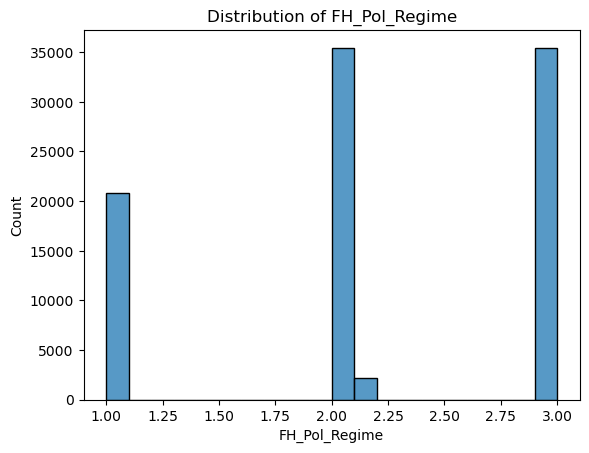

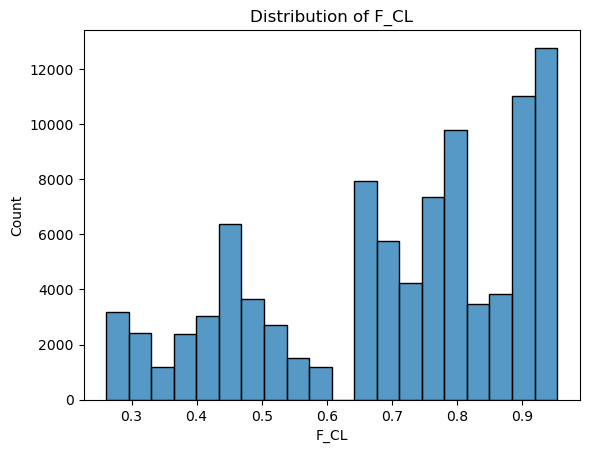

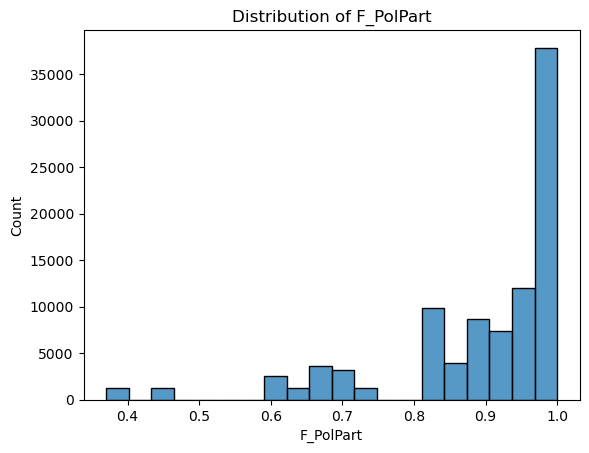

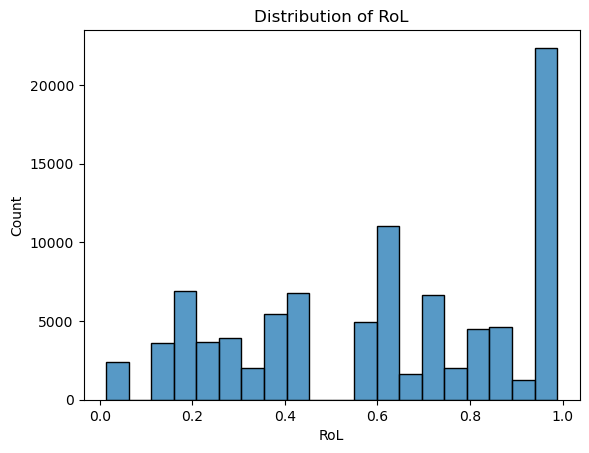

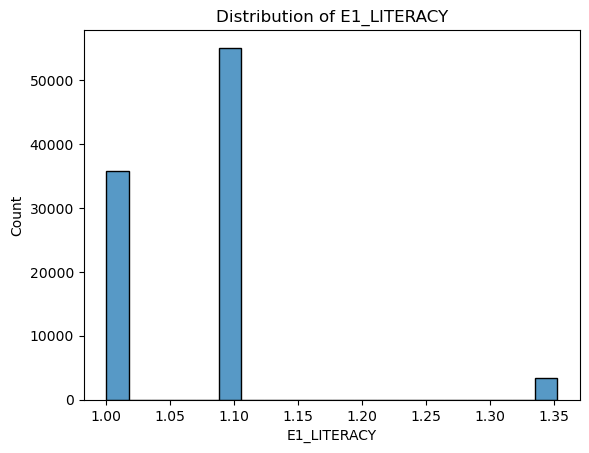

In [60]:
# visualization of selected features
for feature in features:
    sns.histplot(data_wmean[feature], bins = 20)
    plt.title(f'Distribution of {feature}')
    plt.show()

**Method #2:** Use median

In [61]:
# remove all negatives and replace with median
data_wmedian = data.copy()
for col in num_cols:
    non_negative_values = data_wmedian.loc[data_wmedian[col] >= 0, col]
    median_value = non_negative_values.median()

    data_wmedian.loc[data_wmedian[col] < 0, col] = median_value

data_wmedian.head()

,Country_Name,CoW_Name,G_TOWNSIZE,G_TOWNSIZE2,H_SETTLEMENT,H_URBRURAL,LNGE_ISO,E_RESPINT,F_INTPRIVACY,E1_LITERACY,...,td_goveff,td_regqual,td_rulelaw,td_ctrlcorr,TradAgg,SurvSAgg,LNGE_ISO_GROUPED,Birth_Country_Name_Grouped,Mother_Country_Name_Grouped,Father_Country_Name_Grouped
0,AND,AND,5,3,1,1,ca,1,1,1,...,1.9,1.23,1.57,1.23,0.5486,2.182286,ca,ES,ES,ES
1,AND,AND,3,2,2,1,ca,1,1,1,...,1.9,1.23,1.57,1.23,0.5486,2.182286,ca,AD,ES,ES
2,AND,AND,3,2,2,1,ca,1,1,1,...,1.9,1.23,1.57,1.23,0.5486,2.182286,ca,ES,ES,ES
3,AND,AND,3,2,2,1,ca,2,1,1,...,1.9,1.23,1.57,1.23,0.5486,2.182286,ca,ES,ES,ES
4,AND,AND,3,2,2,1,ca,2,1,1,...,1.9,1.23,1.57,1.23,0.5486,2.182286,ca,ES,ES,ES


In [62]:
data_wmedian.describe()

,G_TOWNSIZE,G_TOWNSIZE2,H_SETTLEMENT,H_URBRURAL,E_RESPINT,F_INTPRIVACY,E1_LITERACY,W_WEIGHT,S018,PWGHT,...,RoL,AtJ,td_voiacc,td_polstab,td_goveff,td_regqual,td_rulelaw,td_ctrlcorr,TradAgg,SurvSAgg
count,94278.000000,94278.000000,94278.000000,94278.000000,94278.000000,94278.000000,94278.000000,94278.000000,94278.000000,94278.000000,...,93831.000000,93831.000000,93831.000000,93831.000000,93831.000000,93831.000000,93831.000000,93831.000000,94278.000000,94278.000000
mean,5.305575,3.136649,3.072901,1.313106,1.457137,1.246134,1.036700,1.000000,0.677401,4.009665,...,0.610445,0.659240,0.761964,0.682716,0.968131,1.023978,1.341460,1.388059,0.720195,1.297962
std,2.395506,1.436533,1.490120,0.463760,0.620754,0.430760,0.188025,0.430020,0.238343,6.989796,...,0.294176,0.251069,0.382182,0.281293,0.542729,0.553874,0.407182,0.426360,0.296427,0.591342
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.100485,0.248880,0.006845,...,0.014000,0.159000,0.010000,0.010000,0.000000,0.000000,0.110000,0.010000,0.054588,0.004235
25%,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.899689,0.483793,0.516651,...,0.360000,0.466000,0.750000,0.670000,0.670000,0.730000,1.450000,1.460000,0.726098,1.361061
50%,6.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.775795,1.703383,...,0.645000,0.707000,0.810000,0.670000,0.990000,1.070000,1.450000,1.460000,0.726098,1.361061
75%,7.000000,4.000000,5.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.833333,5.461702,...,0.913000,0.896000,0.860000,0.670000,1.370000,1.240000,1.450000,1.460000,0.726098,1.361061
max,8.000000,5.000000,5.000000,2.000000,3.000000,2.000000,2.000000,19.930071,2.237137,38.668168,...,0.988000,0.983000,1.540000,1.600000,2.210000,2.160000,1.880000,2.170000,1.614605,2.856591


In [63]:
# remove outliers using capping
Q1 = data_wmedian[num_cols].quantile(0.25)
Q3 = data_wmedian[num_cols].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 3.0 * IQR
upper = Q3 + 3.0 * IQR

data_wmedian[num_cols] = data_wmedian[num_cols].clip(lower, upper, axis=1)
data_wmedian.shape

(94278, 536)

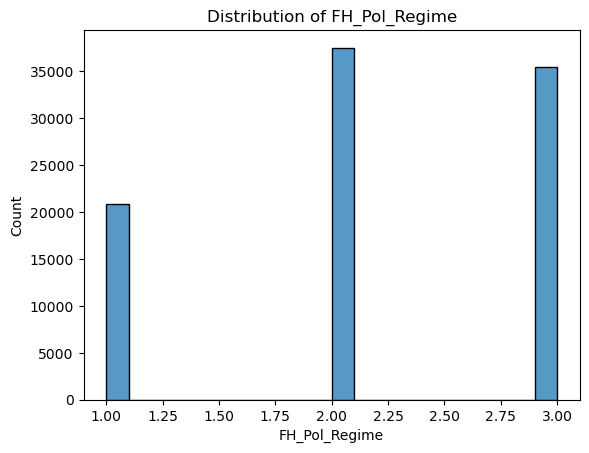

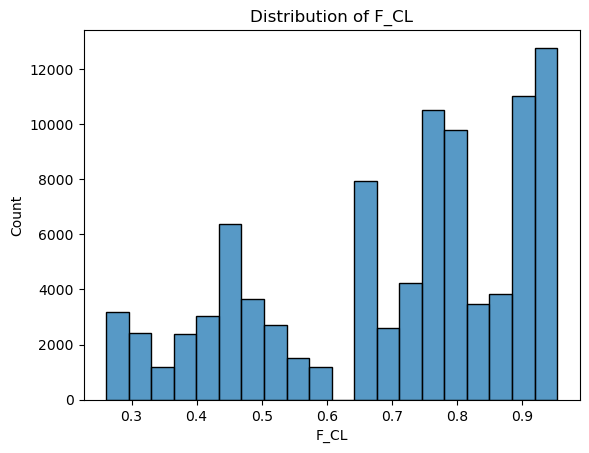

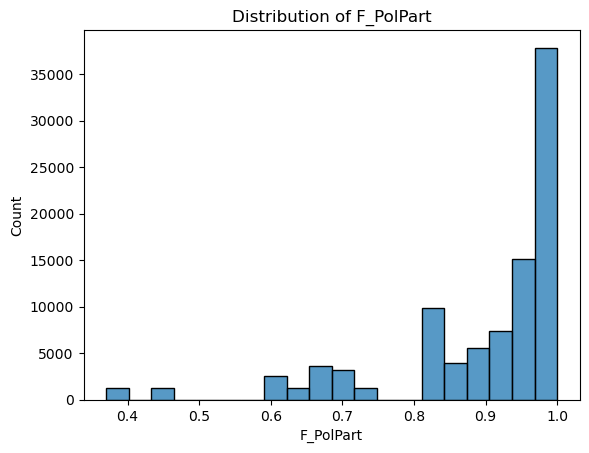

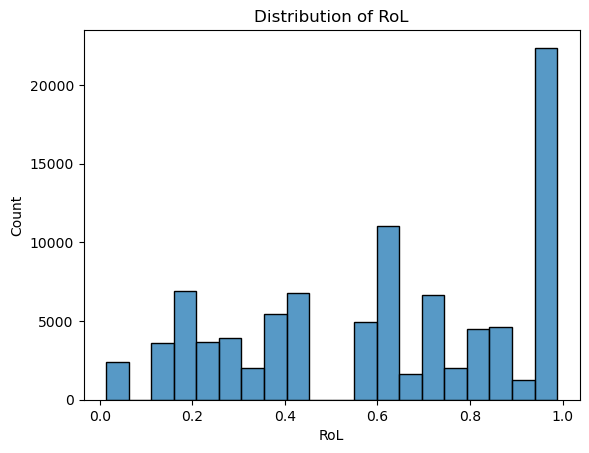

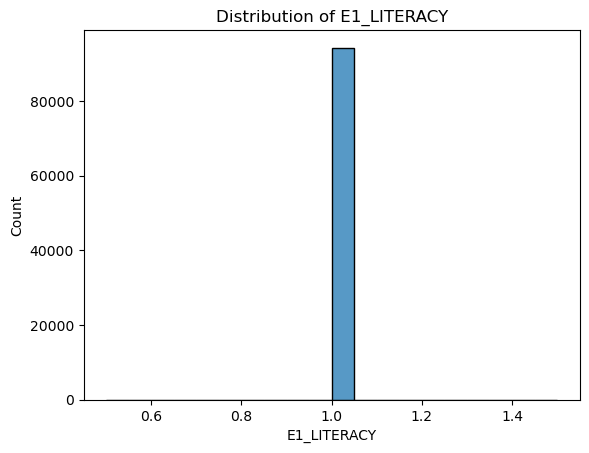

In [64]:
# visualization of selected features
for feature in features:
    sns.histplot(data_wmedian[feature], bins = 20)
    plt.title(f'Distribution of {feature}')
    plt.show()

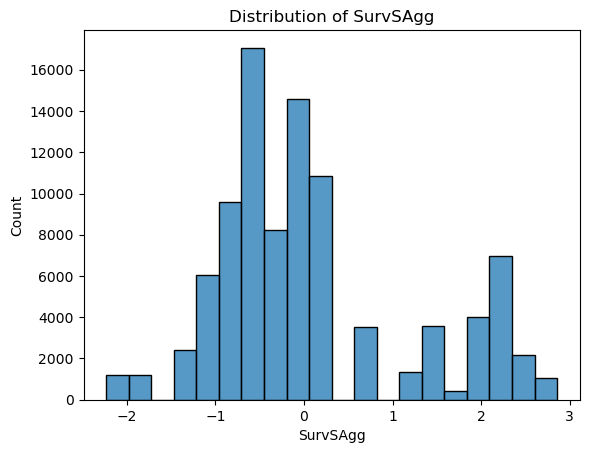

In [65]:
sns.histplot(data["SurvSAgg"], bins = 20)
plt.title(f'Distribution of SurvSAgg')
plt.show()

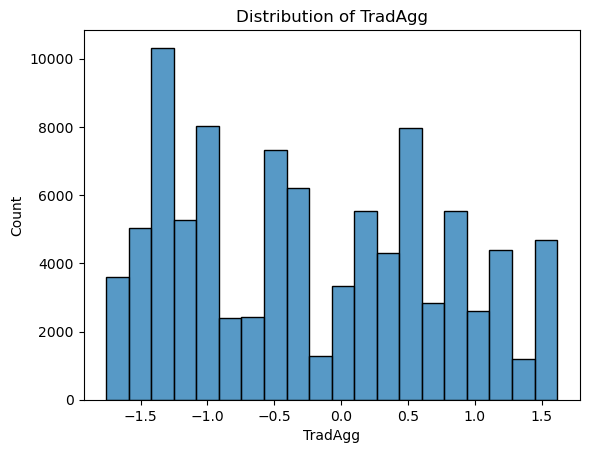

In [66]:
sns.histplot(data["TradAgg"], bins = 20)
plt.title(f'Distribution of TradAgg')
plt.show()